# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config)) 


Using TensorFlow backend.


# 資料預處理

In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型

In [9]:
model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 27s 559us/step - loss: 0.2400 - acc: 0.9286 - val_loss: 0.1146 - val_acc: 0.9634
Epoch 2/10
48000/48000 [==============================] - 25s 519us/step - loss: 0.0930 - acc: 0.9714 - val_loss: 0.0991 - val_acc: 0.9697
Epoch 3/10
48000/48000 [==============================] - 25s 515us/step - loss: 0.0638 - acc: 0.9789 - val_loss: 0.1038 - val_acc: 0.9700
Epoch 4/10
48000/48000 [==============================] - 21s 441us/step - loss: 0.0475 - acc: 0.9848 - val_loss: 0.0845 - val_acc: 0.9762
Epoch 5/10
48000/48000 [==============================] - 10s 219us/step - loss: 0.0364 - acc: 0.9877 - val_loss: 0.0925 - val_acc: 0.9743
Epoch 6/10
48000/48000 [==============================] - 10s 217us/step - loss: 0.0284 - acc: 0.9903 - val_loss: 0.0957 - val_acc: 0.9758
Epoch 7/10
48000/48000 [==============================] - 10s 216us/step - loss: 0.0235 - acc: 0.9922 - val_loss: 0.

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

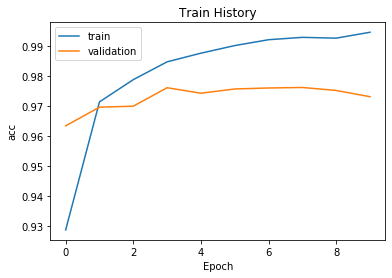

In [14]:
show_train_history(train_history,'acc','val_acc')

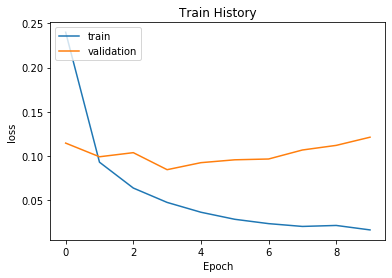

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 65us/step

accuracy= 0.9773
